In [1]:
import cv2,os
def get_id_color(index):
    #temp_index = abs(int(index + 1)) * 3
    if index == 1:
        color=(0,255,0)
    elif index == 2:
        color=(255,0,0)
    elif index ==3 :
        color=(255,255,0)
    text_color_bgr = tuple(reversed(color))
    return text_color_bgr
def mapping(id):
    id_to_char={1:'Healthy',2:'Tomato',3:'Unhealthy'}
    #ids=[1,2,3]
    chars =id_to_char[id]
    return(chars)
def draw_inferences(image,d_bboxes,d_scores,d_class_ids):

    for bbox, score, class_id in zip(d_bboxes, d_scores, d_class_ids):
        x1, y1, x2, y2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
        color = get_id_color(class_id)
        debug_image = cv2.rectangle(image,(x1, y1),(x2, y2),color,thickness=2)
        #score = '%.2f' % score

        #text = str(mapping(class_id))+':'+str(score)
        #debug_image = cv2.putText(debug_image,text,(x1, y1 - 22),cv2.FONT_HERSHEY_SIMPLEX,0.8,color,thickness=2)
    return (debug_image)


[[299 190 325 216]
 [ 56 406 118 468]
 [241 185 287 231]
 [170 358 326 514]
 [283 167 319 203]
 [329 452 405 528]
 [558 374 587 403]
 [488 465 519 496]
 [274 491 304 521]
 [115 536 210 631]
 [100 451 272 623]
 [416 408 469 461]
 [ 38 286 120 368]
 [299 507 335 543]
 [545 448 598 501]
 [578 385 610 417]
 [216 265 321 370]
 [221  85 303 167]
 [421 314 488 381]
 [498 265 544 311]
 [551 246 601 296]
 [556 455 599 498]
 [627 390 640 403]
 [  7 470  93 556]
 [597 370 615 388]
 [372 391 400 419]
 [346 134 452 240]
 [294 347 348 401]
 [396 566 446 616]
 [260 471 293 504]
 [629 557 639 567]
 [  0 159  46 205]] [0.79130507 0.78103656 0.7704567  0.76468617 0.7585776  0.7570136
 0.75394166 0.72159064 0.7182181  0.7161557  0.71510327 0.7088589
 0.7003995  0.6945846  0.6896814  0.6737242  0.6632295  0.6107446
 0.6045589  0.60273963 0.590219   0.5572574  0.5565722  0.5460501
 0.5327854  0.5175541  0.50735086 0.47065786 0.45029625 0.42124456
 0.42105636 0.4165871 ] [2 1 2 1 2 3 2 3 2 1 1 3 1 2 3 2 3 1

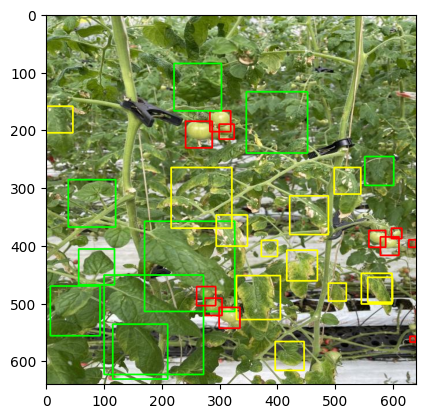

In [7]:
###import detector
%matplotlib inline
import matplotlib.pyplot as plt
from Detector.detector import ObjectDetector
detector_name='yolo_tgi_n'
img_name='IMG_1207_JPG.rf.c9baad90b790f02b5fe0fedbeb57a63c.jpg'  ###Bacteria.jpg,Mold.jpg,Purple leaf.jpg,Yellow virus.jpg
img_dir='img_test'
#img_save_dir=''
img_path=os.path.join(img_dir,img_name)
detector = ObjectDetector(detector_name)
image=cv2.imread(img_path)
d_bboxes, d_scores, d_class_ids = detector(image)
print(d_bboxes, d_scores, d_class_ids )
save_path='inferenced_img.jpg'
labeled_img=draw_inferences(image,d_bboxes,d_scores,d_class_ids)
image_rgb = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
#cv2.imwrite(save_path,labeled_img)
